<a href="https://colab.research.google.com/github/hirajya/CCMACLRL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [ ]:
#put your answer here
df = pd.read_csv('..\data\iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Removes Id column
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

3. Visualize the dataset

## Histogram

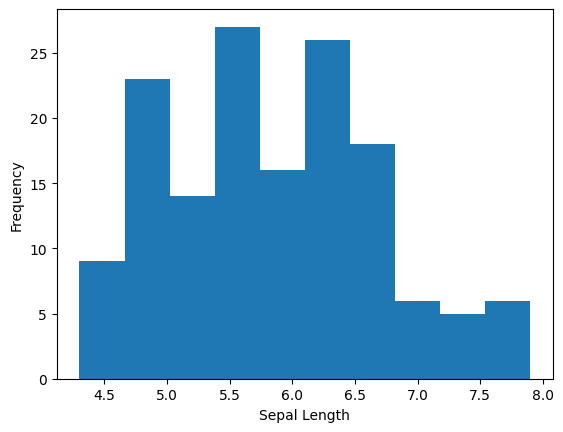

In [ ]:
plt.hist(df["SepalLengthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

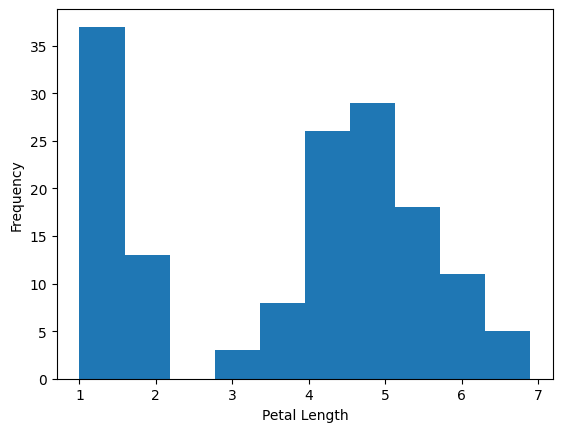

In [ ]:
plt.hist(df["PetalLengthCm"])
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

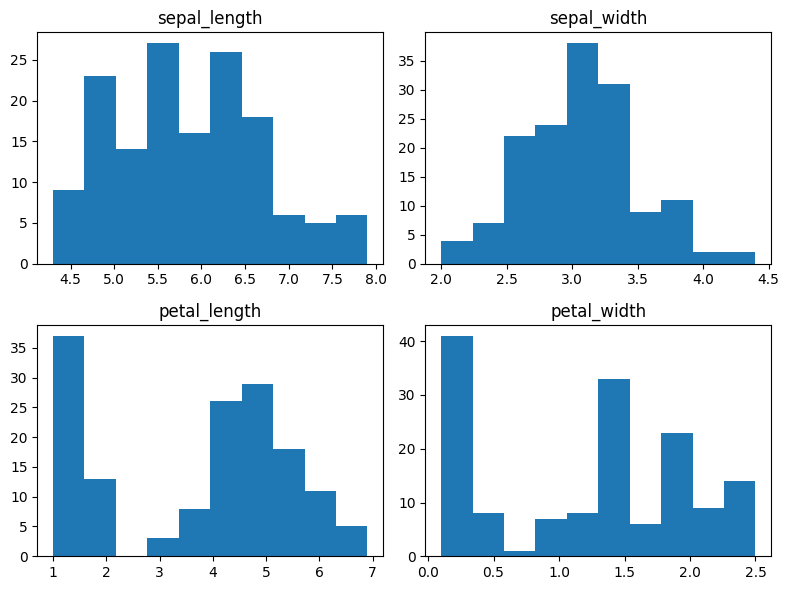

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].hist(df['SepalLengthCm'])
ax[0, 1].hist(df['SepalWidthCm'])
ax[1, 0].hist(df['PetalLengthCm'])
ax[1, 1].hist(df['PetalWidthCm'])

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")

plt.tight_layout()  # Optional: Adjusts spacing to prevent overlap
plt.show()


In [ ]:
colors = {
    'Iris-setosa': 'r',
    'Iris-versicolor': 'y',
    'Iris-virginica': 'b'
}

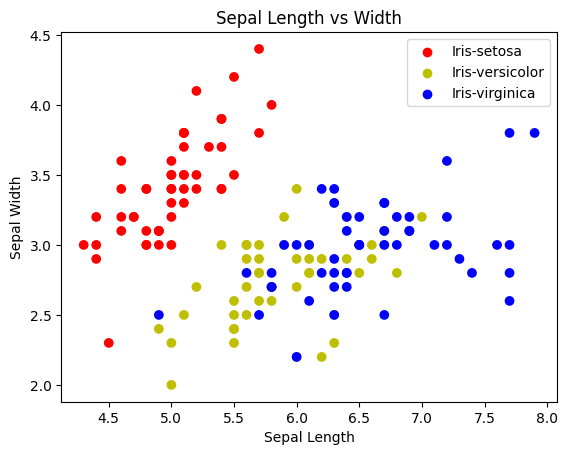

In [ ]:
# put your answer here
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')

# legend
for species in colors:
    plt.scatter([], [], c=colors[species], label=species)

plt.legend()
plt.show()



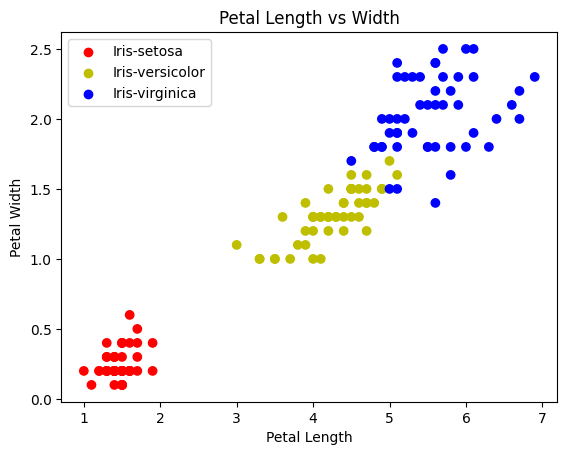

In [ ]:
# put your answer here
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')

# legend
for species in colors:
    plt.scatter([], [], c=colors[species], label=species)

plt.legend()
plt.show()



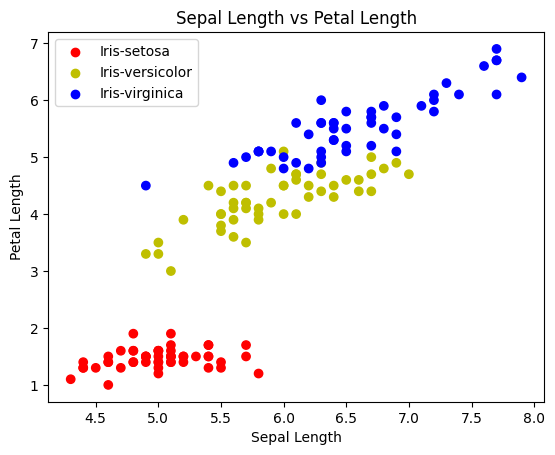

In [ ]:
# put your answer here
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], c=df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
# legend
for species in colors:
    plt.scatter([], [], c=colors[species], label=species)

plt.legend()
plt.show()



4. Split the dataset into a training set and a testing set

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [ ]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [ ]:
y_train.head()

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object

5. Train the model

In [ ]:
from sklearn.metrics import classification_report

# put your answer here
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

6. Test the model

In [ ]:
# put your answer here
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



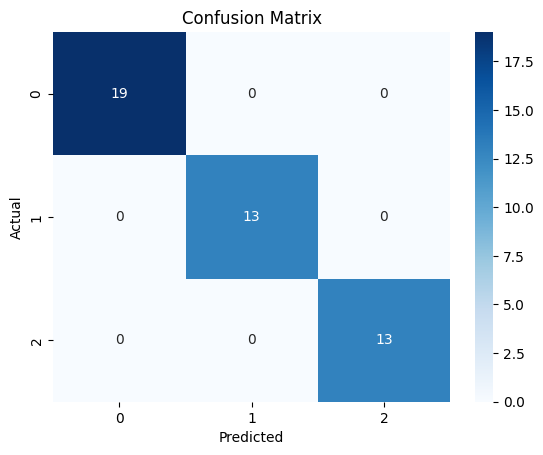

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(knn.predict([[9.9, 9.9, 1.4, 0.2]]))

['Iris-setosa']


c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\task2-yeQWYtX4-py3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
